### CUSTOMER SEGMENTATION WITH PCA AND KMEANS.

In [23]:
# import the needed libraries

import pandas as pd
import numpy as np
import time

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [2]:
# load the dataset

data = pd.read_csv('cleaned_marketing.csv')
data.head(4)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0


In [3]:
# generate age, customer_duration

# get age of customer
data['age'] = [2025 - x for x in data['Year_Birth']]

# convert dt_customer to dattime dtype
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
# get the customer_duration
data['customer_duration'] = [2025 -x.year for x in data['Dt_Customer']]

In [4]:
# drop the irrelevant columns

data.drop(columns = ['ID','Year_Birth','Dt_Customer'], inplace = True)

In [10]:
data = data[data['Income'] != ' ']
data.reset_index(drop = True, inplace=True)
data['Income'] = pd.to_numeric(data['Income'])

In [11]:
cleaned_data = data.copy()

In [12]:
# encode the categorical variables 

cat_cols = ['Education','Marital_Status']

encoder = LabelEncoder()
for col in cat_cols:
    cleaned_data[col] = encoder.fit_transform(cleaned_data[col])

cleaned_data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,customer_duration
0,2,4,58138,0,0,58,635,88,546,172,...,0,0,0,0,0,3,11,1,68,13
1,2,4,46344,1,1,38,11,1,6,2,...,0,0,0,0,0,3,11,0,71,11
2,2,5,71613,0,0,26,426,49,127,111,...,0,0,0,0,0,3,11,0,60,12
3,2,5,26646,1,0,26,11,4,20,10,...,0,0,0,0,0,3,11,0,41,11
4,4,3,58293,1,0,94,173,43,118,46,...,0,0,0,0,0,3,11,0,44,11


In [13]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Education            2216 non-null   int32
 1   Marital_Status       2216 non-null   int32
 2   Income               2216 non-null   int64
 3   Kidhome              2216 non-null   int64
 4   Teenhome             2216 non-null   int64
 5   Recency              2216 non-null   int64
 6   MntWines             2216 non-null   int64
 7   MntFruits            2216 non-null   int64
 8   MntMeatProducts      2216 non-null   int64
 9   MntFishProducts      2216 non-null   int64
 10  MntSweetProducts     2216 non-null   int64
 11  MntGoldProds         2216 non-null   int64
 12  NumDealsPurchases    2216 non-null   int64
 13  NumWebPurchases      2216 non-null   int64
 14  NumCatalogPurchases  2216 non-null   int64
 15  NumStorePurchases    2216 non-null   int64
 16  NumWebVisitsMonth    221

### PRINCIPAL COMPONENT ANALYSIS

In [14]:
# scale the dataset

scaler = StandardScaler()
columns = cleaned_data.columns
cleaned_data = scaler.fit_transform(cleaned_data)
cleaned_data = pd.DataFrame(data = cleaned_data, columns=columns)

In [15]:
# pca

columns = ['col_1', 'col_2', 'col_3']
pca = PCA(n_components=3, random_state=23)
pca_data = pca.fit_transform(cleaned_data)

In [17]:
pca_data = pd.DataFrame(data = pca_data, columns=columns)
pca_data.head()

,col_1,col_2,col_3
0,3.820233,0.224350,-0.299196
1,-2.434453,-0.223991,-0.318555
2,1.621462,-0.205559,-1.098539
3,-2.565351,-1.634184,0.233715
4,-0.489700,-0.233836,-0.505001


In [18]:
kmeans_model = KMeans(n_clusters=4, random_state=23, n_init='auto')
kmeans_model.fit(pca_data)
clusters = kmeans_model.labels_

In [20]:
px.scatter_3d(data_frame=pca_data, x = 'col_1', y='col_2',
              z = 'col_3',color=clusters)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'col_1=%{x}<br>col_2=%{y}<br>col_3=%{z}<br>color=%{marker.color}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': array([0, 1, 0, ..., 3, 3, 3]), 'coloraxis': 'coloraxis', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'scene': 'scene',
              'showlegend': False,
              'type': 'scatter3d',
              'x': array([ 3.82023335, -2.43445298,  1.62146234, ...,  1.39291542,  1.72719338,
                          -1.60810926]),
              'y': array([ 0.22434965, -0.22399093, -0.20555882, ..., -0.21533058,  0.79683681,
                           1.57409738]),
              'z': array([-0.29919614, -0.31855518, -1.09853891, ...,  0.8696113 , -1.31249663,
                           1.16131087])}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'color'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'scene': {'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
                         'xaxis': {'title': {'text': 'col_1'}},
                         'yaxis': {'title': {'text': 'col_2'}},
                         'zaxis': {'title': {'text': 'col_3'}}},
               'template': '...'}
})

In [22]:
data['cluster'] = [f'cluster_{x}' for x in clusters]
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,customer_duration,cluster
0,Graduation,Single,58138,0,0,58,635,88,546,172,...,0,0,0,0,3,11,1,68,13,cluster_0
1,Graduation,Single,46344,1,1,38,11,1,6,2,...,0,0,0,0,3,11,0,71,11,cluster_1
2,Graduation,Together,71613,0,0,26,426,49,127,111,...,0,0,0,0,3,11,0,60,12,cluster_0
3,Graduation,Together,26646,1,0,26,11,4,20,10,...,0,0,0,0,3,11,0,41,11,cluster_1
4,PhD,Married,58293,1,0,94,173,43,118,46,...,0,0,0,0,3,11,0,44,11,cluster_1


In [28]:
data['children'] = data['Kidhome'] + data['Teenhome']
sns.set_style('darkgrid')
sns.set_palette('husl')

<Axes: xlabel='cluster', ylabel='Complain'>

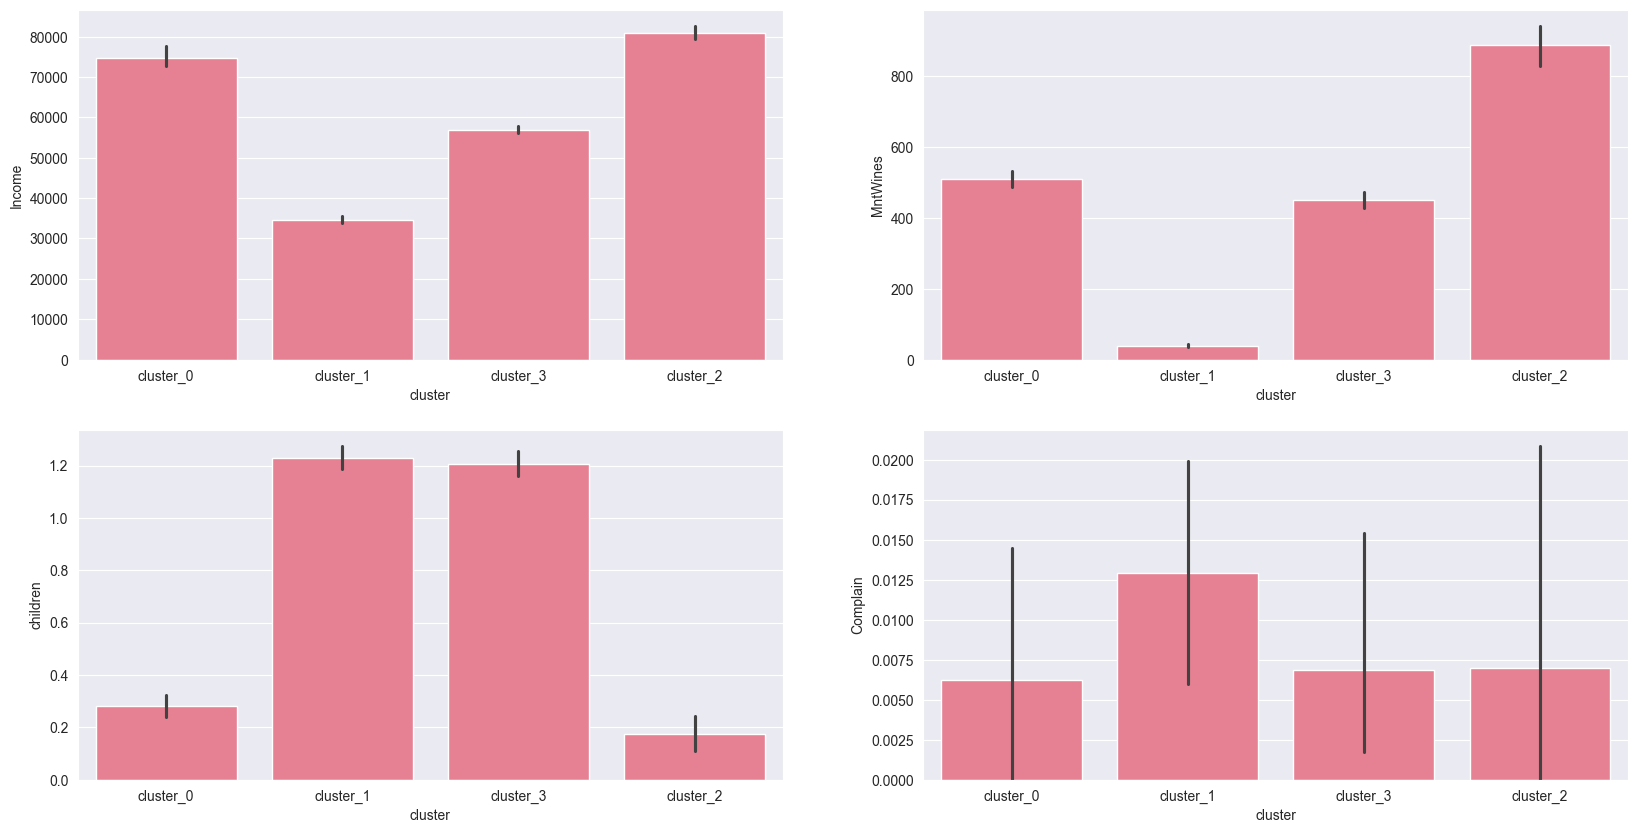

In [34]:
fig, axes = plt.subplots(2,2, figsize=(20,10))
sns.barplot(data = data, x = 'cluster', y = 'Income', ax = axes[0,0])
sns.barplot(data = data, x = 'cluster', y = 'MntWines', ax = axes[0,1])
sns.barplot(data = data, x = 'cluster', y = 'children', ax = axes[1,0])
sns.barplot(data = data, x = 'cluster', y = 'Complain', ax = axes[1,1])


In [33]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'age',
       'customer_duration', 'cluster', 'children'],
      dtype='object')